# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [167]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [168]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Объединим датасеты в список для удобства итерирования.

In [169]:
data = [data_0, data_1, data_2]

### Размер датасета

In [170]:
for i in range(len(data)):
    print("Размер датасета №", i, data[i].shape)

Размер датасета № 0 (100000, 5)
Размер датасета № 1 (100000, 5)
Размер датасета № 2 (100000, 5)


Каждый датасет имеет одинаковую размерность (100000, 5).

### Краткое описание датасетов

In [171]:
for i in range(len(data)):
    print("Информация о датасете №", i, data[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Информация о датасете № 0 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Информация о датасете № 1 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to

Столбец `id` выполняет идентификационную функцию и для исследования не важен. Уберем его из датасета.

In [172]:
for i in range(len(data)):
    data[i] = data[i].drop('id', axis=1)

### Поиск дубликатов

In [173]:
for i in range(len(data)):
    print("Дубликатов в датасете №", i, '=', data[i].duplicated().sum())

Дубликатов в датасете № 0 = 0
Дубликатов в датасете № 1 = 0
Дубликатов в датасете № 2 = 0


Во всём датасете не было найдено дубликатов.

### Поиск пропущенных значений

In [174]:
for i in range(len(data)):
    print("Пропусков в датасете №", i)
    print(data[i].isna().sum())

Пропусков в датасете № 0
f0         0
f1         0
f2         0
product    0
dtype: int64
Пропусков в датасете № 1
f0         0
f1         0
f2         0
product    0
dtype: int64
Пропусков в датасете № 2
f0         0
f1         0
f2         0
product    0
dtype: int64


Пропущенных значений в датасете нет.

**Промежуточный вывод:**
- Был удалён столбец `id`, так как он выполнял идентификационную функцию и не имел отношения к исследованию
- Данные первоначально очень хорошо подготовлены, замечаний к данным нет
- Все признаки в датасете являются численными, категориальных признаков нет

## Обучение и проверка модели

In [175]:
predictions_valid = []

true_target = []
targets_valid = []

predictions_mean = []

def get_predicted_data(df):
    features = df.drop(['product'], axis=1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = \
        train_test_split(features, target, test_size=12345, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid)
    
    predictions_valid.append(predictions)
    true_target.append(target_train.reset_index(drop=True))
    targets_valid.append(target_valid.reset_index(drop=True))
    
    predictions_mean.append(round(predictions.mean(), 0))
    
    print('Средний запас предсказанного сырья = {0:.2f} тыс. баррелей'.format(predictions.mean()))
    print('RMSE модели = {0:.2f}'.format(mean_squared_error(predictions, target_valid)**0.5))
    
for i in range(len(data)):
    print("\nРегион", i+1, "Датасет №", i, ":")
    get_predicted_data(data[i])


Регион 1 Датасет № 0 :
Средний запас предсказанного сырья = 92.69 тыс. баррелей
RMSE модели = 37.44

Регион 2 Датасет № 1 :
Средний запас предсказанного сырья = 68.91 тыс. баррелей
RMSE модели = 0.89

Регион 3 Датасет № 2 :
Средний запас предсказанного сырья = 95.06 тыс. баррелей
RMSE модели = 40.26


In [176]:
print(predictions_mean)

[93.0, 69.0, 95.0]


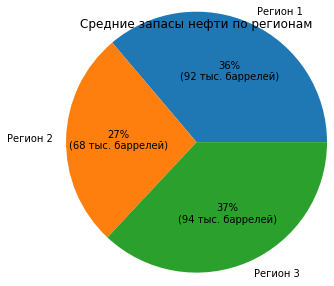

In [177]:
def format_predictions(pct, values):
    absolute = int(pct / 100 * np.sum(values))
    return "{:.0f}%\n({:d} тыс. баррелей)".format(pct, absolute)

labels = ['Регион 1', 'Регион 2', 'Регион 3']
_, ax = plt.subplots()
ax.pie(predictions_mean, labels=labels, autopct=lambda pct: format_predictions(pct, predictions_mean), radius=1.5)
ax.set_title('Средние запасы нефти по регионам')
plt.show();

**Промежуточный вывод:**
- Данные были разбиты на выборки в соотношении 75:25
- Созданы и обучены модели `LinearRegression`
- Сделаны предсказания по объему сырья в скважинах
- Рассчитаны средние значения запасов предсказанного сырья и `RMSE` моделей:
    - `Регион 1:` 92 тыс баррелей, RMSE = 37.44. Такое большое значение говорит о наличии большого разброса данных в валидационных выборках.
    - `Регион 2`: 68 тыс бареллей, RMSE = 0.89
    - `Регион 3`: 94 тыс бареллей, RMSE = 40.26. Такое большое значение говорит о наличии большого разброса данных в валидационных выборках.

## Подготовка к расчёту прибыли

Введём константные переменные из условия задачи

In [178]:
NUMBER_OF_POINTS = 500
BEST_POINTS = 200

BUDGET = 10*(10**9)

BARREL_PRICE = 450000

Далее расчитаем достаточный объем сырья для того, чтобы разработка новой скважины была безубыточной.

In [179]:
print('Средняя лучшая прибыль на точку =', BUDGET / BEST_POINTS, 'тыс.руб.')

print('Средний лучший объем нефти на точку =', (BUDGET / BEST_POINTS) / BARREL_PRICE, 'тыс. баррелей')

print('Средний лучший объем нефти на регион =', BUDGET / BARRELL_PRICE, 'тыс. баррелей')

Средняя лучшая прибыль на точку = 50000000.0 тыс.руб.
Средний лучший объем нефти на точку = 111.11111111111111 тыс. баррелей
Средний лучший объем нефти на регион = 22222222.222222224 тыс. баррелей


Сравним полученные данные с предсказанными запасами по каждому региону.

In [180]:
for i in range(len(predictions_mean)):
    print('Фактический средний запас для региона', i+1, '=', predictions_mean[i])

Фактический средний запас для региона 1 = 93.0
Фактический средний запас для региона 2 = 69.0
Фактический средний запас для региона 3 = 95.0


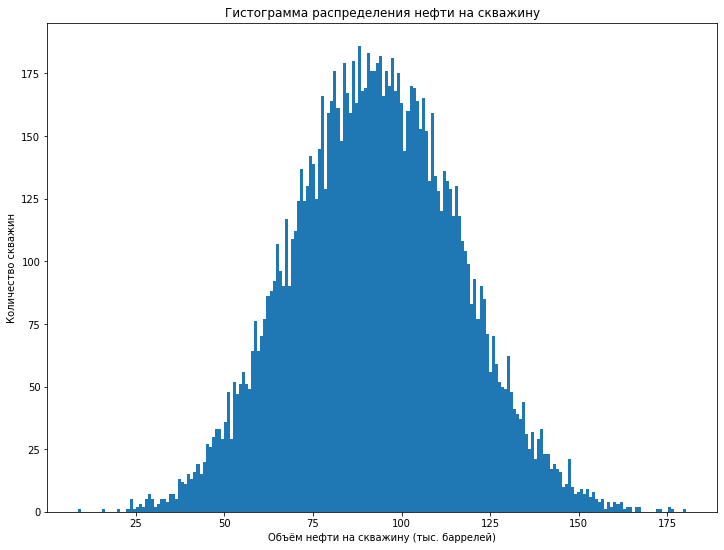

In [181]:
plt.figure(figsize=(12, 9))
plt.hist(predictions_valid[0], bins=200)

plt.ylabel('Количество скважин')
plt.xlabel('Объём нефти на скважину (тыс. баррелей)')
plt.title('Гистограмма распределения нефти на скважину')

plt.show();

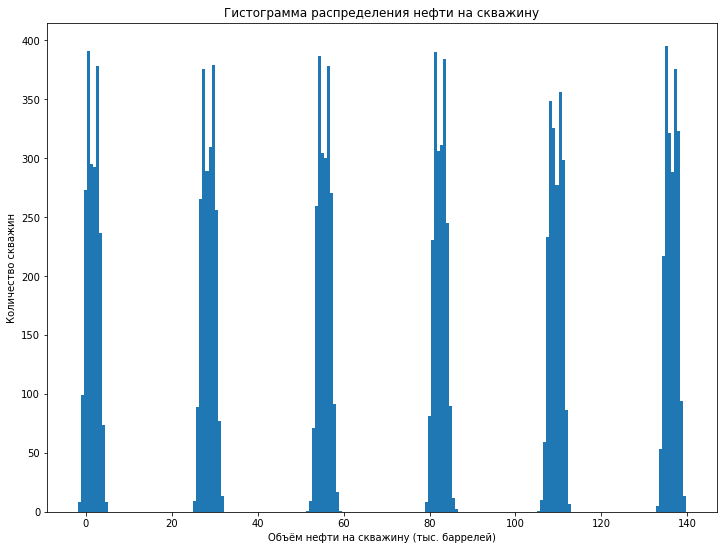

In [182]:
plt.figure(figsize=(12, 9))
plt.hist(predictions_valid[1], bins=200)

plt.ylabel('Количество скважин')
plt.xlabel('Объём нефти на скважину (тыс. баррелей)')
plt.title('Гистограмма распределения нефти на скважину')

plt.show();

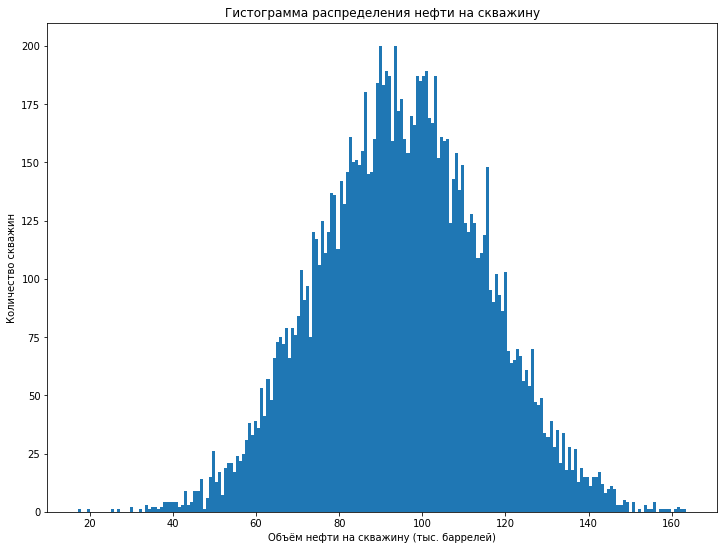

In [183]:
plt.figure(figsize=(12, 9))
plt.hist(predictions_valid[2], bins=200)

plt.ylabel('Количество скважин')
plt.xlabel('Объём нефти на скважину (тыс. баррелей)')
plt.title('Гистограмма распределения нефти на скважину')

plt.show();

**Промежуточный вывод:**

Для каждого региона был проведён анализ средних объёмов нефти:
- Для региона 1 = 93.0
- Для региона 2 = 69.0
- Для региона 3 = 95.0

Исходя из полученных данных, я делаю вывод, что высокая вероятность окупить затраты присутствует в первом и третьем регионах, так как исходя из гистограмм, у нас имеется высокий разброс значений вокруг **93.0** и **95.0**, что говорит о том, что существует достаточно большое количество скважин, где запасы нефти больше необходимого среднего (**111 тыс. баррелей**).

## Расчёт прибыли и рисков 

In [184]:
def oil_profit_calc(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return BARREL_PRICE * selected.sum() - BUDGET

In [185]:
state = np.random.RandomState(12345)
def bootstrap(target, probs):
    values = []
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=NUMBER_OF_POINTS)
        probs_sample = probs[target_sample.index]
        target_sample = target_sample.reset_index(drop=True)
        probs_sample = pd.Series(probs_sample)
        probs_sample = probs_sample.reset_index(drop=True)
        profit = oil_profit_calc(target_sample, probs_sample, BEST_POINTS)
        if profit < 0:
            lost += 1
        values.append(profit)
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    avg = values.mean()
    risk = lost / 1000
    return avg, risk, lower, upper

In [186]:
for i in range(len(data)):
    predictions = predictions_valid[i]
    target = targets_valid[i]
    avg, risk, lower, upper = bootstrap(target, predictions)
    
    print('Данные по региону', i+1)
    print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(avg))
    print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower, upper))
    print('Процент риска {:.2%}'.format(risk))
    print()

Данные по региону 1
Средняя прибыль по региону = 367763235.26 тыс.руб.
95% доверительный интервал от -129456901.66 до 928586081.65 тыс.руб.
Процент риска 7.70%

Данные по региону 2
Средняя прибыль по региону = 471349125.93 тыс.руб.
95% доверительный интервал от 68908990.27 до 879693145.36 тыс.руб.
Процент риска 1.00%

Данные по региону 3
Средняя прибыль по региону = 418454836.31 тыс.руб.
95% доверительный интервал от -72259747.37 до 949843619.29 тыс.руб.
Процент риска 5.10%



**Промежуточный вывод:**
Исходя из расчётов по регионам, только второй регион имеет самый малый процент риска (**1.00%**). Второй регион имеет среднюю прибыль **471349125.93 тыс.руб.** Поэтому мы можем отсеить первый и третий регион, как потенциально менее прибыльное. К тому же, доверительный интервал второго региона не имеет отрицательных значений, что говорит о том, что даже при не очень удачном выборе скважин, разработка этих самых скважин окупится.

## Итоговый вывод

**Предобработка данных:**
- Был удалён столбец `id`, так как он выполнял идентификационную функцию и не имел отношения к исследованию
- Данные первоначально очень хорошо подготовлены, замечаний к данным нет
- Все признаки в датасете являются численными, категориальных признаков нет

**Обучение и проверка модели:**
- Данные были разбиты на выборки в соотношении 75:25
- Созданы и обучены модели `LinearRegression`
- Сделаны предсказания по объему сырья в скважинах
- Рассчитаны средние значения запасов предсказанного сырья и `RMSE` моделей:
    - `Регион 1:` 92 тыс баррелей, RMSE = 37.44. Такое большое значение говорит о наличии большого разброса данных в валидационных выборках.
    - `Регион 2`: 68 тыс бареллей, RMSE = 0.89
    - `Регион 3`: 94 тыс бареллей, RMSE = 40.26. Такое большое значение говорит о наличии большого разброса данных в валидационных выборках.

**Подготовка к расчёту прибыли:**
Для каждого региона был проведён анализ средних объёмов нефти:
- Для региона 1 = 93.0
- Для региона 2 = 69.0
- Для региона 3 = 95.0

Исходя из полученных данных, я делаю вывод, что высокая вероятность окупить затраты присутствует в первом и третьем регионах, так как исходя из гистограмм, у нас имеется высокий разброс значений вокруг **93.0** и **95.0**, что говорит о том, что существует достаточно большое количество скважин, где запасы нефти больше необходимого среднего (**111 тыс. баррелей**).

**Расчёт прибыли и рисков:**
Исходя из расчётов по регионам, только второй регион имеет самый малый процент риска (**1.00%**). Второй регион имеет среднюю прибыль **471349125.93 тыс.руб.** Поэтому мы можем отсеить первый и третий регион, как потенциально менее прибыльное. К тому же, доверительный интервал второго региона не имеет отрицательных значений, что говорит о том, что даже при не очень удачном выборе скважин, разработка этих самых скважин окупится.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован